<a href="https://colab.research.google.com/github/iamhero2709/Learning-Projects-Notebook/blob/main/ml_projects/pca_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIMENSIONALITY REDUCTION FROM SCARTCH
---
* WHAT IS DIMESNIONALITY REDUCTION ??
* Mapping higher dimesnional data into lower dimensional data without afftecting the moel


1.PCA
----
* Principal componenet analysis
* Gaol - To find new axis (direction) thats called principal compoent  that explain maximum variance in data
* STEPS
* 1- Calculate the mean of the data ( to make it centered )
* 2- computing covarinace matrix
* 3- computing eigen values and eigen vectores
* 4-sort and slect top k eigen vectors
* 5- projeting data into new space






 WHAT IS EIGN VECTOR AND EIGEN VALUES ???
---
* Eigen vectors - Direction of maximum variancre
* Eigen values - Magnitude of the directions

In [1]:
# importing libraraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Pca:
  def __init__(self,n_components):
    self.n_components=n_components
    self.mean=None
    self.components=None
    self.explained_varaince =None
  def fit(self,X):
    #setp 1 mean of data
    self.mean=np.mean(X,axis=0)
    X_centered=X-self.mean
    # step 2 covaraince matrix
    cov_matrix=np.cov(X_centered.T)
    # step 3 eigen values and eigen vectors
    eigen_values,eigen_vectors=np.linalg.eigh(cov_matrix)
    # sorting  top k eigen values
    sorted_idx=np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[sorted_idx]
    eigen_vectors = eigen_vectors[:, sorted_idx]
     # Step 5: Store top k eigenvectors and variances
    self.components = eigen_vectors[:, :self.n_components]
    self.explained_variance = eigen_values[:self.n_components]

  def transform(self,X):
    X_centered=X-self.mean
    return np.dot(X_centered, self.components)

  def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

  def explained_variance_ratio(self):
        return self.explained_variance / np.sum(self.explained_variance)


Tesing on Iris Data
---

Explained Variance Ratio: [0.94572232 0.05427768]


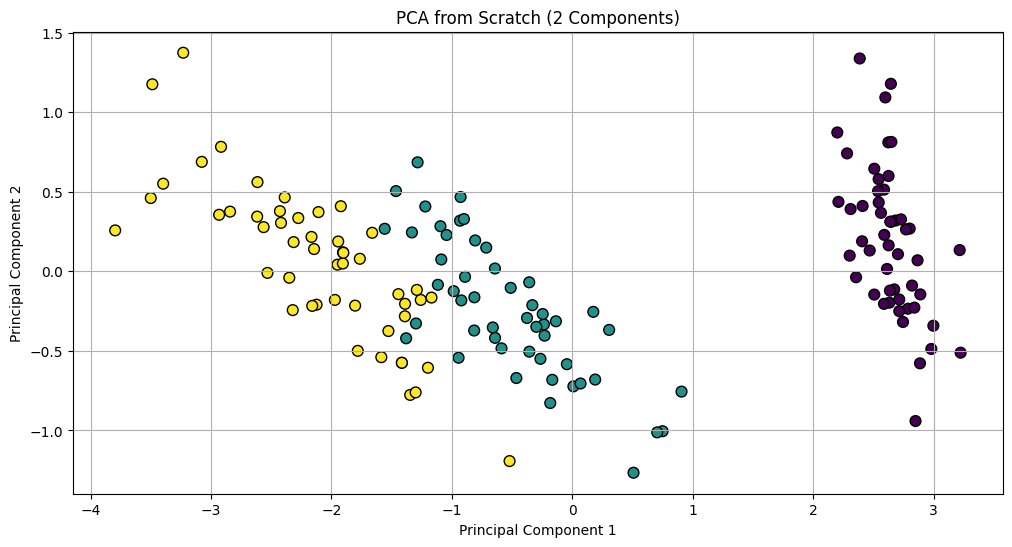

In [4]:
from sklearn.datasets import load_iris

# load datsets
iris=load_iris()
X=iris.data
y=iris.target

# craete a pca object
pca =Pca(n_components=2) # Corrected n_component to n_components
# fit and transform
X_reduced=pca.fit_transform(X)
#Print explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio())

# PLOT RESULTS
plt.figure(figsize=(12,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.title("PCA from Scratch (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()